### we will use this model to test the accuracy of Benign malinancy

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('breast_cancer_data.csv')

In [3]:
data.head()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:

### use to scale or standarized everything
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [10]:
scaler.fit(data.drop('class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaler_features = scaler.transform(data.drop('class', axis = 1))

In [13]:
scaler_features

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ..., 
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [24]:
fet = pd.DataFrame(scaler_features, columns = data.columns[:-1])

In [25]:
fet.head()

,clumpThickness,CellSize,CellShape,Adhesion,Epithelial,BareNucleic,Chromatin,Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [26]:
from sklearn.cross_validation import train_test_split

In [29]:
X = fet
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,pred))

[[126   6]
 [  5  68]]


In [37]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

     benign       0.96      0.95      0.96       132
  malignant       0.92      0.93      0.93        73

avg / total       0.95      0.95      0.95       205



In [38]:
### choosing better k model

In [44]:
error_rate = []

for i in range(1,14):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

In [48]:
plt.figure(figsize=(10,6))

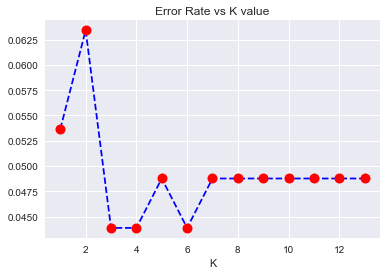

In [53]:
plt.plot(range(1,14), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')

In [56]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

     benign       0.98      0.95      0.97       132
  malignant       0.92      0.96      0.94        73

avg / total       0.96      0.96      0.96       205

[[126   6]
 [  3  70]]
